In [64]:
%matplotlib inline

import importlib.util
import scipy.misc
import time
import tensorflow

import numpy as np
import matplotlib.pyplot as plt

#Import the vizdoom package since it can't be installed normally on Windows

vizdoom = importlib.util.spec_from_file_location('vizdoom',
                                                 'C:/Anaconda3/envs/doom/Lib/site-packages/vizdoom/vizdoom.pyd')
vd = importlib.util.module_from_spec(vizdoom)
vizdoom.loader.exec_module(vd)


In [65]:
#Normalize and flatten an image array representing the game state at a given time stamp

def preprocess(image):
    image = image.astype(np.float32)
    image /= 255.0
    
    return image
    

In [ ]:
#Initialize a new game and specify the scenario and screen format/resolution

game = vd.DoomGame()
game.set_screen_format(vd.ScreenFormat.BGR24)
game.set_screen_resolution(vd.ScreenResolution.RES_640X480)
game.load_config('basic.cfg')
game.init()

#Specify the available actions in the scenario and the parameters

shoot = [0, 0, 1]
left = [1, 0, 0]
right = [0, 1, 0]
actions = [left, right, shoot]

episodes = 1
experience = list()
t = 0
pretrain_steps = 1000


In [91]:
#For each time step, collect the following data:
#The current game state
#The action that was taken taken
#The reward obtained from the chosen action
#The next game state (if the episode hasn't ended yet)
#A variable indicating whether the episode is over yet

#for i in range(episodes):
while t < pretrain_steps:
    game.new_episode()

    while not game.is_episode_finished():
        state = game.get_state()
        state1 = preprocess(state.screen_buffer)
        action = np.random.randint(3)
        reward = game.make_action(actions[action])
        done = game.is_episode_finished()

        if done == False:
            state = game.get_state()
            state2 = preprocess(state.screen_buffer)
        
        elif done == True:
            state2 = None
        
        experience.append((state1, action, reward, state2, done))
        
        #print("reward:", reward)
        t += 1
        time.sleep(0.02)    
    
    print("Result:", game.get_total_reward())
    print("Current Time Step:", t)
    time.sleep(2)

print(len(experience))
print(t)
game.close()


Result: -94.0
Current Time Step: 160
Result: 23.0
Current Time Step: 223
Result: 95.0
Current Time Step: 229
Result: -375.0
Current Time Step: 529
Result: -380.0
Current Time Step: 829
Result: -390.0
Current Time Step: 1129
1129
1129


In [71]:
experience[-2][0].shape

(480, 640, 3)

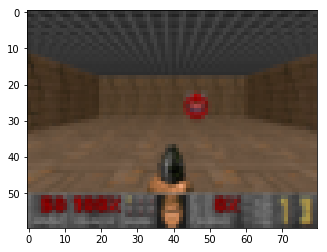

In [82]:
plt.imshow(scipy.misc.imresize(experience[2][0], (60, 80)))

In [25]:
np.random.randint(3)

1